In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
graph_size = (13,6)

import python.display as dp
import python.data as data
import python.voxels as voxel

project_folder = "veleval"


In [2]:
data.add_time_elapsed("files/"+project_folder+"_wtime/data_processed/observations.df", 0)

In [3]:
data.simplify_gps("files/"+project_folder+"_wtime/data_processed/observations.df", 
                  "files/"+project_folder+"_wtime/data_processed/observations_simplified.df", 0, dim=3)

In [4]:
data.add_speed("files/"+project_folder+"_wtime/data_processed/observations.df")
data.add_speed("files/"+project_folder+"_wtime/data_processed/observations_simplified.df")

In [5]:
with open("files/"+project_folder+"_wtime/data_processed/observations_simplified.df",'rb') as infile:
    df_simplified = pickle.load(infile)
'''tab_routes_voxels_simplified, tab_routes_voxels_simplified_global, dict_voxels_simplified = voxel.generate_voxels(
    df_simplified, df_simplified.iloc[0]["route_num"], df_simplified.iloc[-1]["route_num"])'''
df_simplified = df_simplified[df_simplified["speed"]>0]

In [6]:
with open("files/"+project_folder+"_wtime/data_processed/observations.df",'rb') as infile:
    df = pickle.load(infile)
df = df[df["speed"]>0]

22


[]

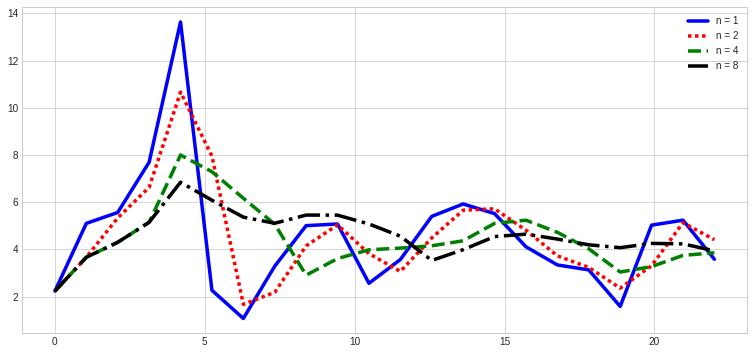

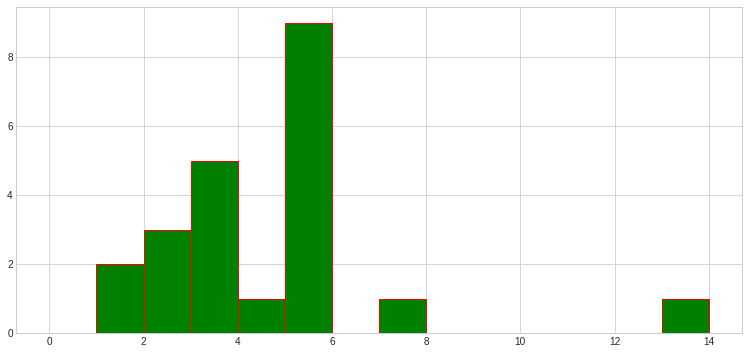

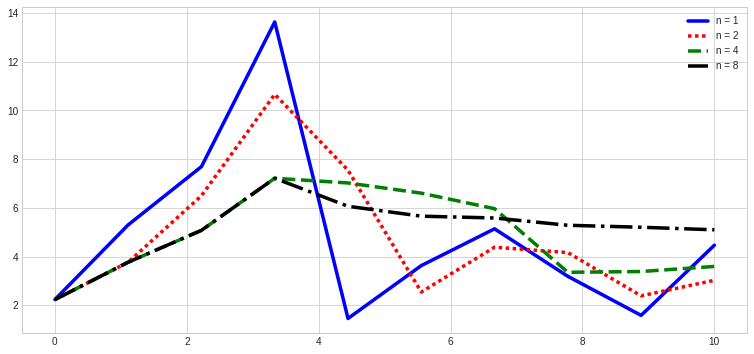

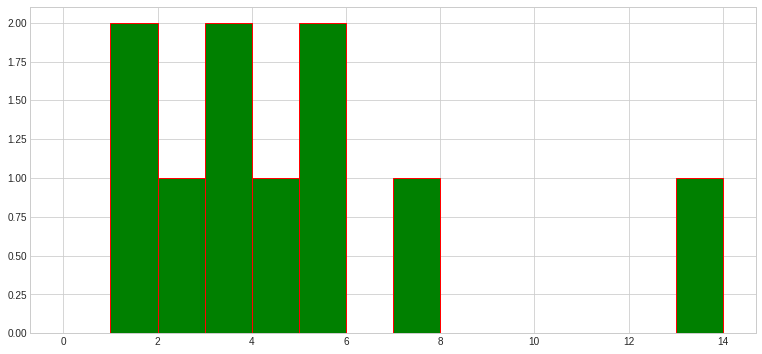

In [11]:
num_route = 10
nb_graph=3

df_temp = df[df["route_num"]==num_route]
tab_speed = data.compute_speed(df_temp)
#df_temp.insert(loc=2, column='speed', value=tab_speed)
df_temp = df_temp[df_temp["speed"]>0]
fig = plt.figure(figsize=graph_size)
ax = plt.axes()
x = np.linspace(0, len(df_temp), len(df_temp))
tab_avg_speed = data.compute_average_speed(df_temp, 1)
plt.plot(x, tab_avg_speed, color='blue', linewidth=3.5, label='n = 1')
tab_avg_speed = data.compute_average_speed(df_temp, 2)
plt.plot(x, tab_avg_speed, color='red', linestyle=(0,(1,1)), linewidth=3.5, label='n = 2')
tab_avg_speed = data.compute_average_speed(df_temp, 4)
plt.plot(x, tab_avg_speed, color='green', linestyle='dashed', linewidth=3.5, label='n = 4')
tab_avg_speed = data.compute_average_speed(df_temp, 8)
plt.plot(x, tab_avg_speed, color='black', linestyle='dashdot', linewidth=3.5, label='n = 8')
plt.legend(loc='upper right')
#plt.savefig('images/graph_'+str(nb_graph)+'.png')

tab_speed = df_temp["speed"].values
fig = plt.figure(figsize=graph_size)
values, _, _ = plt.hist(tab_speed, range(0, int(max(tab_speed)+2)), color='green', edgecolor = 'red')
plt.plot()

df_temp_simplified = df_simplified[df_simplified["route_num"]==num_route]
fig = plt.figure(figsize=graph_size)
ax = plt.axes()
x = np.linspace(0, len(df_temp_simplified), len(df_temp_simplified))
tab_avg_speed = data.compute_average_speed(df_temp_simplified, 1)
plt.plot(x, tab_avg_speed, color='blue', linewidth=3.5, label='n = 1')
tab_avg_speed = data.compute_average_speed(df_temp_simplified, 2)
plt.plot(x, tab_avg_speed, color='red', linestyle=(0,(1,1)), linewidth=3.5, label='n = 2')
tab_avg_speed = data.compute_average_speed(df_temp_simplified, 4)
plt.plot(x, tab_avg_speed, color='green', linestyle='dashed', linewidth=3.5, label='n = 4')
tab_avg_speed = data.compute_average_speed(df_temp_simplified, 8)
plt.plot(x, tab_avg_speed, color='black', linestyle='dashdot', linewidth=3.5, label='n = 8')
plt.legend(loc='upper right')
#plt.savefig('images/graph_'+str(nb_graph)+'_simplified.png')

tab_speed = df_temp_simplified["speed"].values
fig = plt.figure(figsize=graph_size)
values, _, _ = plt.hist(tab_speed, range(0, int(max(tab_speed)+2)), color='green', edgecolor = 'red')
plt.plot()

In [8]:
tab_time_specification = []
for i in range(2):
    tab_time_specification.append([])
    df_temp = df[df["route_num"]==i]
    df_temp_s = df_simplified[df_simplified["route_num"]==i]
    tab_speed = df_temp["speed"].values
    (sum(i < 1 for i in tab_speed))
    for i in [2,4,8]:
        tab_avg_speed = data.compute_average_speed(df_temp_s, i)
        tab_time_specification[-1].append(mean(tab_avg_speed))
        tab_time_specification[-1].append(stdev(tab_avg_speed))
    
    
    
    

NameError: name 'mean' is not defined